<a href="https://colab.research.google.com/github/danielcpcp/FIRST-PROJECTS/blob/main/ActFinal_1_Bases_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Alumno: Daniel Carrasco Pardo

# Actividad Final Bases de datos

Esta actividad ha sido realizada entorno a la librería de fastai. Se han entrenado un total de 3 modelos de IA para desarrollar 3 ejemplos de técnicas de visualización por computador

* El primer modelo ha sido entrenado con el dataset de imágenes de mascotas que provee la librería. En este primer ejemplo se buscaba conseguir identificar si una imagen dada como input contenía un chihuahua o no
* El segundo modelo fue entrenado con el mismo dataset y, en este caso, se buscaba ser capaz de identificar la especie concreta de animal de la imágen dada como input. 
* El último de los modelos ha sido separado de este cuaderno por problemas de compatibilidad de librerías y se encuentra en el mismo directorio con el nombre 'ActFinal_2_Bases_de_Datos'

Instalación de las librerías correspondientes para los dos primeros modelos

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 11.0 MB/s 
     |████████████████████████████████| 186 kB 43.5 MB/s 
     |████████████████████████████████| 1.2 MB 37.9 MB/s 
     |████████████████████████████████| 46 kB 4.3 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 51 kB 348 kB/s 
Mounted at /content/gdrive


Importamos ahora todos los módulos de fastbook usando el *


In [ ]:
from fastbook import *

## Modelo de IA Nº1. Identificar si la foto es o no de un chihuahua

Lo primero que vamos a hacer es guardar el directorio de la carpeta de imágenes del dataset de Mascotas en la variable path

In [ ]:
path = untar_data(URLs.PETS)/'images'

Creamos una funcion que devuelva True si una imagen es de chihuahua y False si no es así, empleando para ello el nombre de la imagen. Esto nos va a servir para crear las etiquetas necesarias para el entrenamiento del modelo

In [ ]:
def is_chihuahua(x):
    chihuahua = False
    if 'chihuahua' in x:
        chihuahua = True 
    return chihuahua

Cargamos las imágenes en dls_1 y llamamos a la función is_chihuahua para conocer su etiqueta, que es el target que vamos a utilizar (chihuahua o no chihuahua)

In [ ]:
dls_1 = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_chihuahua, item_tfms=Resize(224))

Comprobamos a continuación si la clasidicación se ha hecho correctamente ejecutando varias veces la siguiente línea de código. Encima de cada imagen veremos un True si la mascota es un chihuahua y un False si no lo es


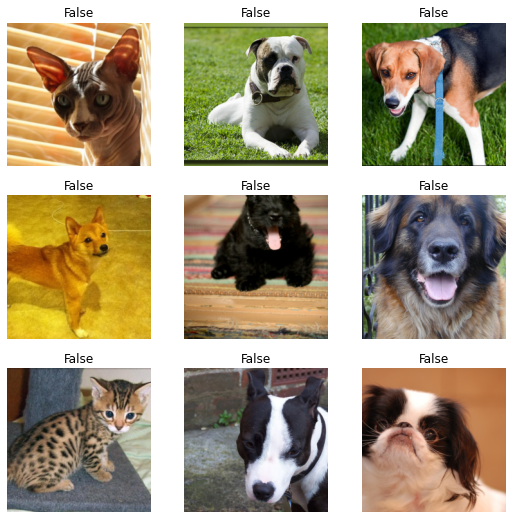

In [ ]:
dls_1.show_batch()

Entrenamiento del modelo usando un cnn_learner. Este modelo está ya preentrenado para el reconocimiento de imágenes con un gran volumen de datos. Lo que se hace posteriormente es reentrenar este modelo con nuestro conjunto de datos (más específico). En el caso de este ejemplo con imágenes de perros y de gatos. En la siguiente url se puede consultar la documentación de este modelo https://fastai1.fast.ai/vision.learner.html#cnn_learner

* Al ejecutar la siguiente línea de código se entrenará el modelo utilizando el conjunto de datos. Hay que tener en cuenta que este proceso puede tardar varios minutos

In [ ]:
learn_1 = cnn_learner(dls_1, resnet34, metrics=error_rate)
learn_1.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,0.691134,0.176124,0.042625,01:38


epoch,train_loss,valid_loss,error_rate,time
0,0.149339,0.051586,0.008796,02:14


En la celda anterior podemos ver el error_rate, así como otros parámetros fruto del entrenamiento...

Hemos utilizado para ver el error el conjunto de datos de test, aún así resulta interesante testear el modelo con imágenes que no se encontraban en el conjunto de datos original. Las siguientes líneas de código permiten probar el modelo con cualquier imágen

Podemos probar el modelo con nuestras propias fotografías (en la actividad he dejado una carpeta llamada 'images_to_test' que pueden ser utilizadas para comprobar el correcto funcionamiento de este primer modelo)

La siguiente línea de código crea un widget que permite importar una imágen al cuaderno de una forma extremadamente sencilla. Basta utilizar el botón upload

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])

Mostramos por pantalla la imagen importara al mismo tiempo que verificamos el correcto funcionamiento

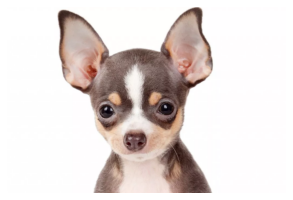

In [ ]:
img.show()

El siguiente paso consiste en predecir si es o no un chihuahua utilizando el modelo entrenado

Lo que hacemos es utilizar el modelo entrenado con nuestro dataset 'learn_1' y le damos como imput la imagen que introducimos anteriormente en la variable 'img'

In [ ]:
chihuahua,_,probs_1 = learn_1.predict(img)

if chihuahua == 'True':
  answer = 'Sí!'
else:
  answer = 'No'

print(f"¿Es la imagen introducida de un chihuahua?: {answer}")
print(f"La probabilidad de que se un chihuahua es de {probs_1[1].item():.6f}")

¿Es la imagen introducida de un chihuahua?: Sí!
La probabilidad de que se un chihuahua es de 0.999949


*** Ya hemos conseguido conocer si el animal en la imagen es un chihuahua o no lo es. Pero podríamos intentar también ser capaz de reconocer exactamente que raza de animal es, de todas las contenidas en el conjunto de datos de entrenamiento *** 


* Esta tarea es más compleja, y la desarrollaremos en el segundo modelo

## Modelo de IA Nº2. Identificar la raza exacta del animal de la fotografía

La raza del animal está siempre contenida en el nombre del fichero, así que podemos extraerla y usarla como etiqueta

Veamos por ejemplo el nombre de la fotografía 10 ...

In [ ]:
get_image_files(path)[10].name

'german_shorthaired_165.jpg'

Para reducir el código a escribir creamos una variable con el get_image_files a la que llamaremos files

In [ ]:
files = get_image_files(path)

Para extraer los labels realizaremos los siguientes dos pasos:

In [ ]:
name = r'^(.*)_\d+.jpg'

Con la anterior expresión regular extraemos el nombre de los ficheros

Breve explicación de la expresión regular utilizada: 
* '^' Marca el inicio de línea
* '.' indica cualquier carácter en la línea
* '*' Indica cero o más carácteres, haciendo referencia al '.' situado justo antes se refiere al número de carácteres que pueden ser cualquier caracter 
* El '_' de después se usa porque el nombre de fichero lo contiene (ver output de línea 16)
* '\d' indica un carácter numérico
* '+' indica una o más, colocado después de '\d' signidica que puede haber un dígito o más de uno)


Cargamos en la variable 'dls_2' las imágenes y utilizamos la expresión regular explicada anteriormente para extraer los nombres de los ficheros que serán utilizados como etiquetas

In [ ]:
dls_2 = ImageDataLoaders.from_name_re(path, files, name, item_tfms=Resize(224))

Para comprobar el correcto funcionamiento mostramos las imágenes y comprobamos si las etiquetas han sido añadidas correctamente

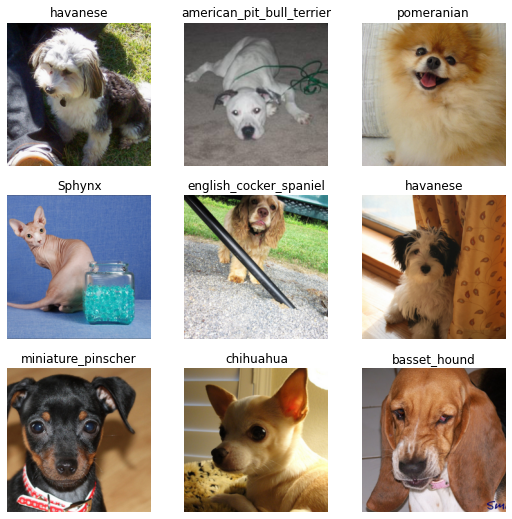

In [ ]:
dls_2.show_batch()

En efecto, ya tenemos los nombres listos para ser usados por los modelos de IA

* Debido a que el problema de clasificación de la raza exacta es mucho más difícil de resolver, y que además el número de fotografías tampoco es excesivamente grande, será necesario hacer alguna técnica de aumentación de datos, que conseguiremos modificando el image loader. Haciendo un resize de la data

In [ ]:
dls_2 = ImageDataLoaders.from_name_re(path, files, name, item_tfms=Resize(460),batch_tfms=aug_transforms(size=224))

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


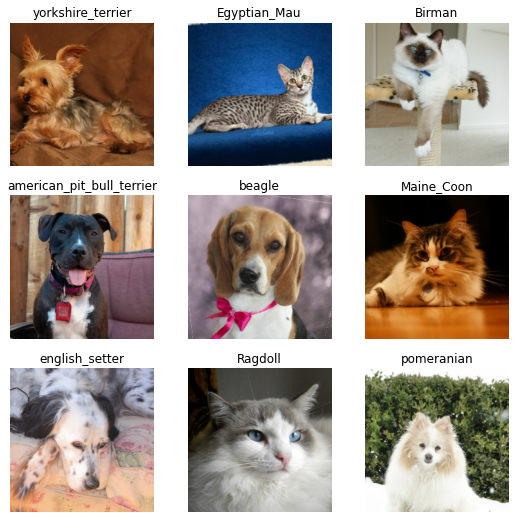

In [ ]:
dls_2.show_batch()

Entrenaremos al modelo de una forma similar a la que hicimos anteriormente en el Modelo Nº1, empleando también el modelo preentrenado en imágenes learn_2

In [ ]:
learn_2 = cnn_learner(dls_2, resnet34, metrics=error_rate)

Aunque podemos utilizar los valores por defecto que se utilizaron anteriormente, sería aún más interesante buscar los mejores... para afinar las predicciones, esto resulta vital hacerlo en este modelo ya que el 'task' a resolver ya no es tan sencillo

El siguiente código, mediante el empleo del método 'lr_find' busca encontrar los mejores parámetros para el entrenamiento

SuggestedLRs(valley=0.001737800776027143)

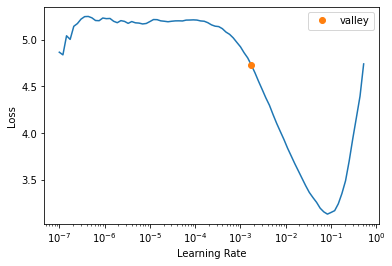

In [ ]:
learn_2.lr_find()

La figura anterior muestra la tasa de aprendizaje, que puede darnos una idea de que valores podemos utilizar. Se elige 4.5 e-3 ya que seguramente obtenga los mejores resultados en el entrenamiento. Este valor puede ser modificado u optimizado si las predicciones no son buenas

In [ ]:
learn_2.fine_tune(2,4.5e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.122009,0.363104,0.112314,01:49


epoch,train_loss,valid_loss,error_rate,time
0,0.603227,0.527645,0.157645,02:24
1,0.367884,0.247486,0.077131,02:24


Ahora podemos mostrar un ejemplo de los resultados obtenidos, y podemos ver si el predicho y el real son el mismo. Además, si es así los nombres aparecerán en verde, mientras que si la predicción es errónea estos apareceran en un color rojo

Esta celda puede ser ejecutada varias veces y obtendremos resultados distintos cada vez, en el caso que queramos ver más predicciones

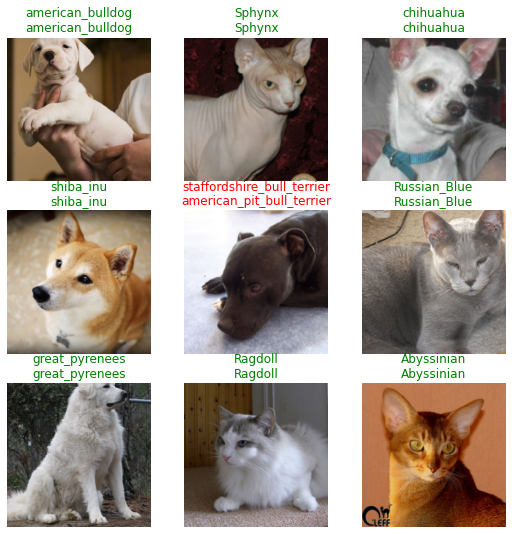

In [ ]:
learn_2.show_results()

Se ha añadido una funcionalidad que permite importar nuestras propias imágenes para hacer una predicción de las mismas utilizando este modelo. Esto permitirá verificar que el modelo es capaz de identificar correctamente la raza de la mascota que introducimos

* Recordar que hay un directorio que he introducido con imágenes de prueba, para tenerlas a mano en el caso de que se quieran utilizar estas

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Cargamos la imagen importada y realizamos la predicción, usando el segundo modelo en este caso

In [ ]:
img = PILImage.create(uploader.data[0])
predicted = learn_2.predict(img)

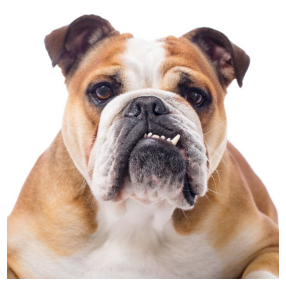

In [ ]:
img.show()

Nos da como uno de los resultados un tensor con un valor para cada una de las categorías. El valor mayor será la categoría más probable y será la que elija el modelo

Con la siguiente línea, accediendo a predicted[2] podemos imprimir por pantalla el tensor con las probabilidades que ha dado el modelo a cada una de las razas

In [ ]:
print(predicted[2])

tensor([2.1381e-07, 1.5612e-07, 8.2170e-06, 5.6104e-07, 2.7275e-06, 4.6416e-07, 3.5545e-09, 1.5903e-06, 5.4127e-06, 1.5300e-07, 7.1996e-06, 1.3406e-05, 1.3309e-01, 2.0713e-03, 2.9217e-06, 3.6886e-05,
        2.4406e-01, 4.1889e-06, 1.0712e-08, 4.2975e-08, 1.0856e-06, 2.6515e-07, 2.5565e-06, 9.0674e-07, 2.5439e-08, 8.9745e-08, 1.6850e-06, 3.3260e-08, 1.5403e-07, 6.1715e-01, 4.1534e-04, 8.5646e-08,
        5.4566e-07, 9.8982e-06, 3.0897e-03, 2.3209e-05, 3.4705e-06])


Guardamos la probabilidad máxima, que será la raza predicha y la multimplicamos por 100 para convertirla en un porcentaje

In [ ]:
probability = predicted[2].max() * 100

In [ ]:
print(f'La imagen que ha introducido es de un {predicted[0]} con una probabilidad de {probability} %')


La imagen que ha introducido es de un pug con una probabilidad de 61.71509552001953 %


Gracias a la línea anterior podemos ver la raza predicha y también la probabilidad de que esta sea correcta

Gracias a FastAI es posible interpretar los resultados del aprendizaje de una forma muy amigable

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_2)
losses,idxs = interp.top_losses()

Podemos visualizar con la siguiente línea de código las peores predicciones, para intentar averiguar donde tiene más problemas el modelo e intentar solventarlos de la manera más conveniente. Aportando un mayor número de ejemplos de estos animales al modelo para el aprendizaje, filtrando elementos del fondo, etcétera

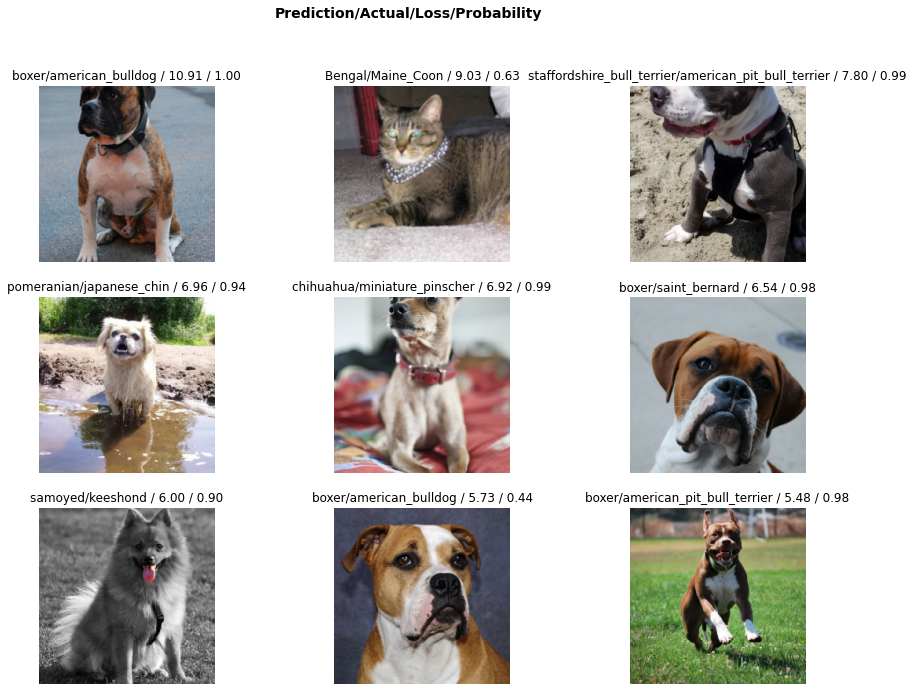

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

Como muestra el título tenemos primero la raza predicha después la real y posteriormente la pérdida y la probabilidad de las predicciones

Para analizar los resultados de los modelos de IA es siempre muy interesante visualizar la matriz de confusión de las predicciones. A continuación se muestra la matriz de confusión del modelo entrenado

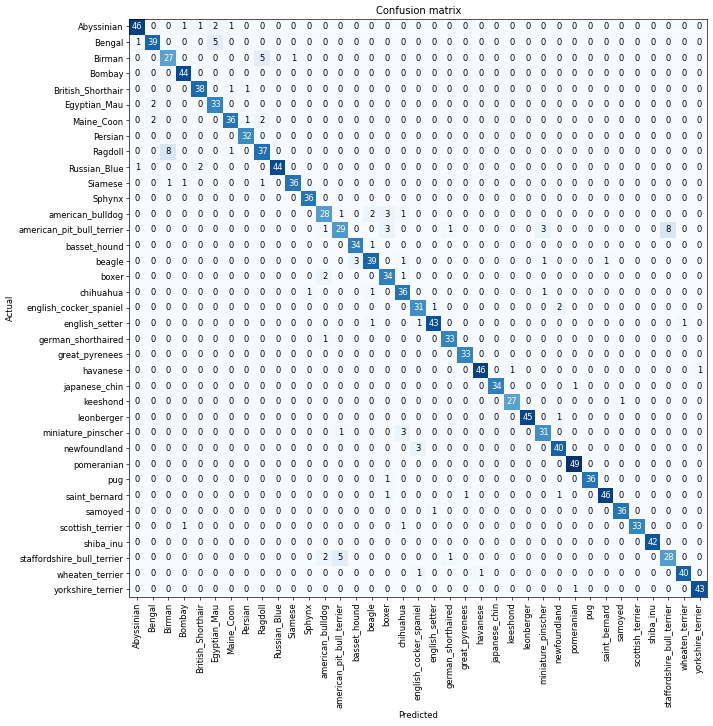

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

Gracias a esta matriz de confusión que hemos representado podemos ver donde se confunde más nuestro modelo, para intentar entender el motivo

Podemos ver que el american pit bull terrier es confundido 6 veces por el staffordshire bull terrier, que el ragdoll es confundido 5 veces con el Birman, etcétera

* El siguiente modelo (Modelo 3) ha sido separado de este cuaderno, y se encuentra en el fichero con nombre 'ActFinal_2_Bases_de_Datos'